In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import sqlite3
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from order_summary",conn)
df.to_csv('order_summary.csv', index=False)
df

,order_id,customer_id,purchase_date,delivered_date,delivery_days,product_id,product_category_name,price,shipping_charges,payment_type,payment_value,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22,2017-10-26,5.0,90K0C1fIyQUf,toys,223.51,84.65,credit_card,259.14,varzea paulista,SP
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20,2018-07-03,14.0,qejhpMGGVcsl,watches_gifts,170.80,23.79,credit_card,382.39,armacao dos buzios,RJ
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16,2018-02-27,11.0,qUS5d2pEAyxJ,costruction_tools_garden,64.40,17.38,credit_card,249.25,jandira,SP
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18,2018-08-27,10.0,639iGvMyv0De,toys,264.50,30.72,credit_card,27.79,uberlandia,MG
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22,2018-01-05,15.0,1lycYGcsic2F,toys,779.90,30.66,credit_card,76.15,ilhabela,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87402,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19,2018-08-30,11.0,W8vikEizUggJ,toys,31.99,188.65,wallet,128.00,amparo,SP
87403,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15,2017-12-20,6.0,KXSbyJWtMMwZ,toys,282.00,1.64,wallet,106.86,itapevi,SP
87404,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24,2018-07-27,3.0,EG4wDSpFyTth,health_beauty,58.10,4.09,credit_card,376.39,sao paulo,SP
87405,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11,2018-08-14,4.0,ZWyg4uNWPHjJ,toys,2899.00,113.01,voucher,48.05,paulinia,SP


In [3]:
df.dtypes

order_id                  object
customer_id               object
purchase_date             object
delivered_date            object
delivery_days            float64
product_id                object
product_category_name     object
price                    float64
shipping_charges         float64
payment_type              object
payment_value            float64
customer_city             object
customer_state            object
dtype: object

In [4]:
df['purchase_date'] = pd.to_datetime(df['purchase_date']).dt.date
df['delivered_date'] = pd.to_datetime(df['delivered_date']).dt.date

In [5]:
df.dtypes

order_id                  object
customer_id               object
purchase_date             object
delivered_date            object
delivery_days            float64
product_id                object
product_category_name     object
price                    float64
shipping_charges         float64
payment_type              object
payment_value            float64
customer_city             object
customer_state            object
dtype: object

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
purchase_date            0
delivered_date           0
delivery_days            0
product_id               0
product_category_name    0
price                    0
shipping_charges         0
payment_type             0
payment_value            0
customer_city            0
customer_state           0
dtype: int64

In [7]:
df[df['shipping_charges']==0]


,order_id,customer_id,purchase_date,delivered_date,delivery_days,product_id,product_category_name,price,shipping_charges,payment_type,payment_value,customer_city,customer_state
3558,XHMhpM4tloHq,KQwN7Nd2lf2Q,2017-11-11,2017-11-27,17.0,zKVvPw7yAwu1,health_beauty,19.98,0.0,credit_card,175.27,estancia velha,RS
11577,jTHvokgb0GEn,TW4g33hHtaNQ,2017-04-08,2017-04-18,10.0,9ZIFmr723AZ0,health_beauty,148.50,0.0,credit_card,155.72,sao paulo,SP
13051,WIHSQjiTK9qV,ERsoYLUtCAGO,2017-12-13,2017-12-21,9.0,ZeMdY9hO43n5,toys,100.00,0.0,wallet,43.56,aracatuba,SP
13468,9OgeeCb5UCkc,GMFHK7VYdxot,2017-06-08,2017-06-19,11.0,pseA9q0kudhV,toys,495.95,0.0,wallet,501.50,serra azul de minas,MG
19015,Af5T1pjI84Rm,oAEcEXPdpqt8,2017-06-12,2017-07-04,23.0,6Ww1i7qd1Zqu,cool_stuff,71.80,0.0,credit_card,335.35,salvador,BA
20860,bpsXjZjDXSm5,dAXWffpWrQxP,2018-01-04,2018-01-13,9.0,ZeMdY9hO43n5,toys,100.00,0.0,credit_card,43.56,irapuru,SP
25057,vKowCiKqbDEc,wISNu1i9U91e,2017-06-19,2017-06-29,11.0,bJWTdVsrXOgZ,toys,128.99,0.0,credit_card,79.76,nilopolis,RJ
29840,3K75NUsqnm9S,nZ9aq7YhCGXK,2017-02-06,2017-02-13,7.0,5EWnZ1mRjH3i,toys,91.33,0.0,credit_card,31.14,brasilia,DF
39500,8V2y12GkZ9hz,br56wGfNm62Q,2017-09-19,2017-10-13,25.0,L2NBqZlceabM,toys,71.80,0.0,credit_card,335.35,porto alegre,RS
47973,Xk7Rvql1N5eu,hqWolkQHhNMt,2018-02-03,2018-03-12,38.0,0LTIekFGdhqg,watches_gifts,159.90,0.0,credit_card,610.89,iramaia,BA


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
delivery_days,87407.0,12.968938,9.277882,1.00,7.000,11.00,16.000,210.00
price,87407.0,342.159931,559.596792,0.85,59.650,136.90,399.200,6735.00
shipping_charges,87407.0,44.246731,37.658242,0.00,20.045,35.01,57.150,409.68
payment_value,87407.0,268.766694,344.801754,0.00,84.335,171.86,313.545,7274.88


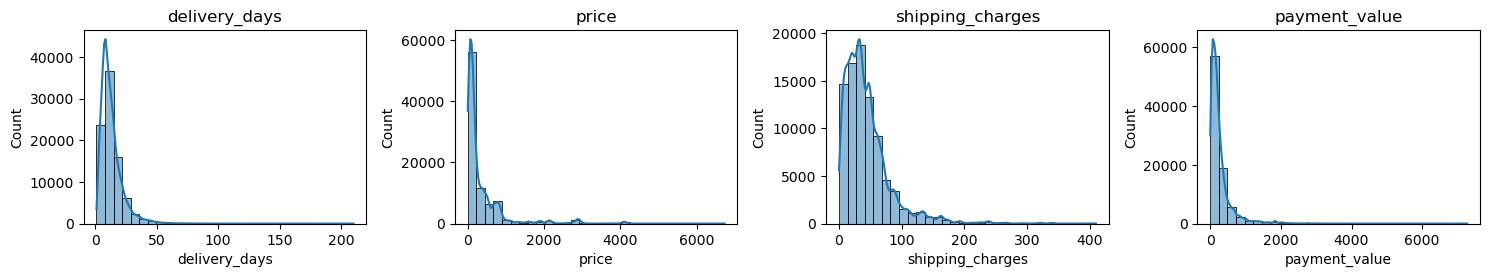

In [9]:
# Select all numerical columns in the DataFrame
numerical_cols = df.select_dtypes(include = np.number).columns
# ➤ This filters out only numeric columns like Quantity, SalesDollars, Profit, etc.

# Set figure size for the entire plot canvas
plt.figure(figsize = (15,10))
# ➤ Defines the size of the full figure — wide enough for multiple subplots

# Loop through each numeric column and create a histogram plot
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  # ➤ Create subplots in a 4x4 grid (adjust as needed)
    sns.histplot(df[col], kde=True, bins=30)  # ➤ Plot histogram with KDE (density curve)
    plt.title(col)  # ➤ Add title (column name) to each subplot
# Adjust layout to prevent overlapping plots
plt.tight_layout()
# ➤ Ensures subplots don’t overlap — makes the plot readable

# Display the final figure with all subplots
plt.show()
# ➤ Renders the complete grid of distribution plots

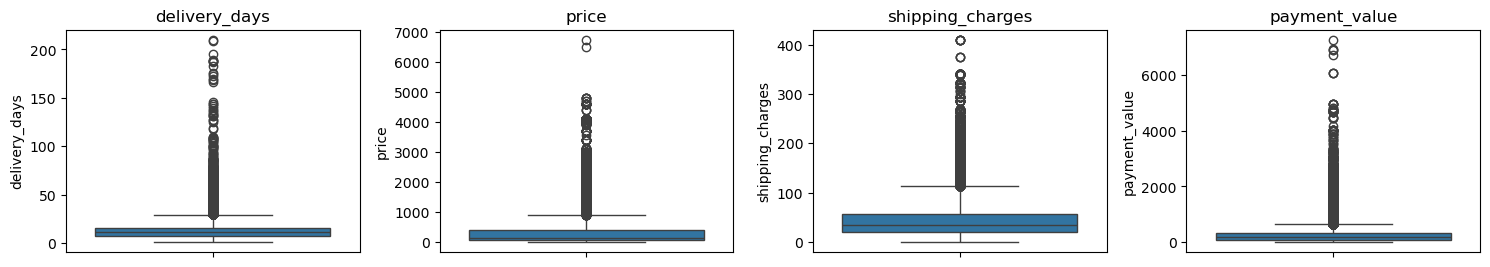

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"   # Convert to millions if >= 1 million
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"       # Convert to thousands if >= 1,000
    else:
        return f"{value:.2f}"                # Keep original value if small
top_products_categories = df.groupby('product_category_name')['payment_value'].sum().nlargest(10)
print(top_products_categories.apply(lambda x :format_dollars(x)))

product_category_name
toys                      17.56M
health_beauty            567.84K
bed_bath_table           559.03K
sports_leisure           488.54K
furniture_decor          458.29K
computers_accessories    451.17K
watches_gifts            393.22K
housewares               363.78K
garden_tools             241.13K
telephony                235.55K
Name: payment_value, dtype: object


### Which product categories contribute the most to total sales?

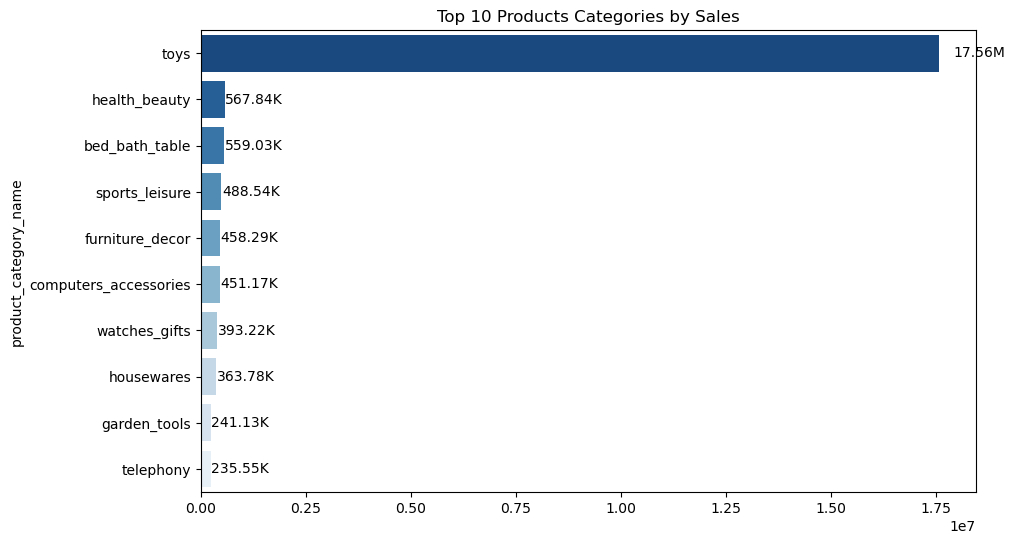

In [12]:

plt.figure(figsize=(10,6))
ax1=sns.barplot(y=top_products_categories.index, x=top_products_categories.values, palette="Blues_r")  
plt.title("Top 10 Products Categories by Sales")
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),  # X-position (slightly beyond bar width)
        bar.get_y() + bar.get_height() / 2,          # Y-position (middle of bar)
        format_dollars(bar.get_width()),             # Convert width (sales) to $ format
        ha='left', va='center', fontsize=10, color='black'  # Text formatting
    )

### Which individual products generate the highest revenue and order volume?

product_id
9NwzO0Pm0fDM    134.30K
0vbEvli2JYJu    132.32K
1edaUIVffPFF    115.63K
UgkSjxoiV9Ev    105.78K
ro08JPncYzLh    104.73K
Biwi1BNtUB7l     97.78K
SLTlrWtcYt1m     94.30K
sCONCvmO1cEY     73.87K
Ffe8gTdmyO3U     50.44K
dAz11YkQkoue     47.24K
Name: payment_value, dtype: object


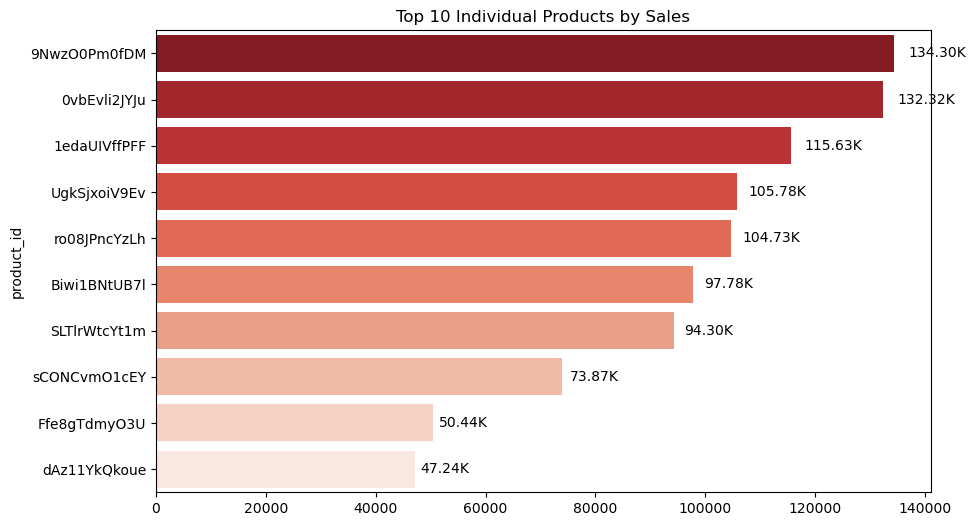

In [13]:
top_products = df.groupby('product_id')['payment_value'].sum().nlargest(10)
print(top_products.apply(lambda x :format_dollars(x)))

plt.figure(figsize=(10,6))
ax1=sns.barplot(y=top_products.index, x=top_products.values, palette="Reds_r")  
plt.title("Top 10 Individual Products by Sales")
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),  # X-position (slightly beyond bar width)
        bar.get_y() + bar.get_height() / 2,          # Y-position (middle of bar)
        format_dollars(bar.get_width()),             # Convert width (sales) to $ format
        ha='left', va='center', fontsize=10, color='black'  # Text formatting
    )

### How do sales vary across year or months?


,year,total_sales,formatted_sales
0,2016,63263.74,63.26K
1,2017,10677705.79,10.68M
2,2018,12751120.85,12.75M


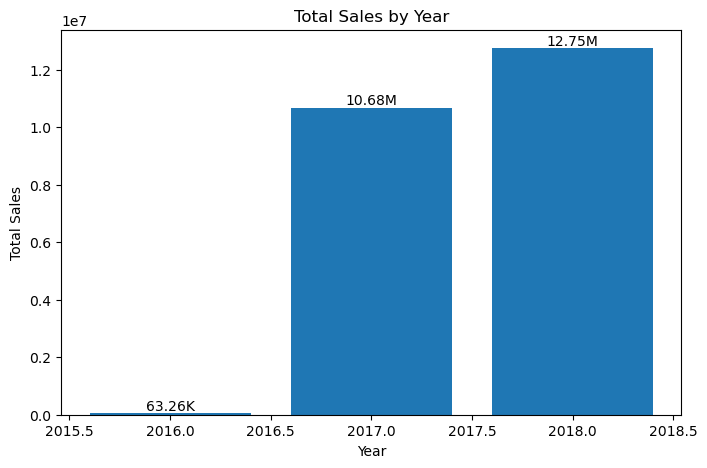

In [14]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Extract Year
df['year'] = df['purchase_date'].dt.year
sales_by_year = (
    df.groupby('year')['payment_value']
    .sum()
    .reset_index()
    .rename(columns={'payment_value': 'total_sales'})
)
sales_by_year['formatted_sales'] = sales_by_year['total_sales'].apply(format_dollars)
display(sales_by_year)
plt.figure(figsize=(8,5))
plt.bar(sales_by_year['year'], sales_by_year['total_sales'])

# Add formatted labels above bars
for i, val in enumerate(sales_by_year['total_sales']):
    plt.text(sales_by_year['year'][i], val, format_dollars(val), ha='center', va='bottom')

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

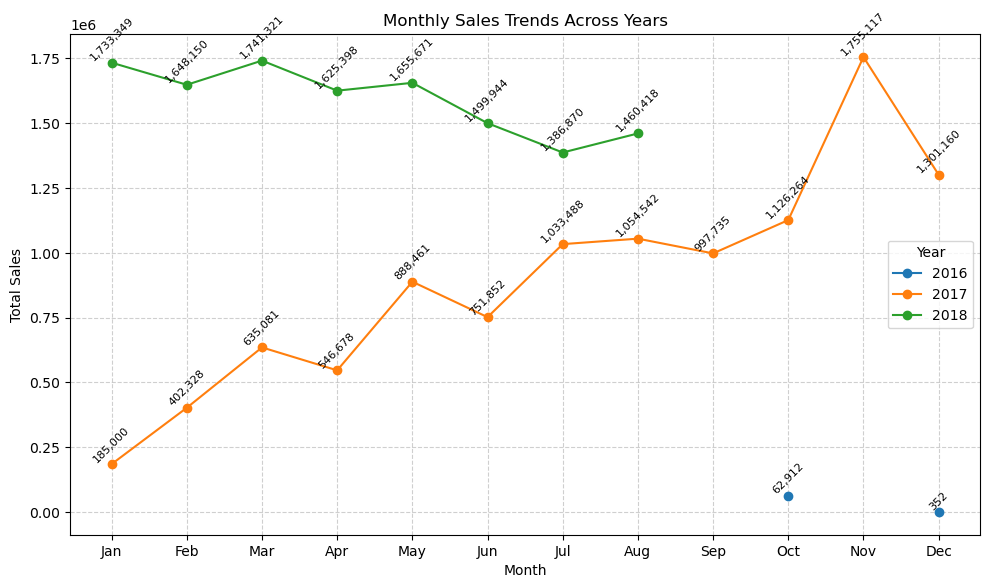

In [15]:
# Convert to datetime if not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Extract Year and Month
df['year'] = df['purchase_date'].dt.year
df['month'] = df['purchase_date'].dt.month

sales_by_month = (
    df.groupby(['year', 'month'])['payment_value']
    .sum()
    .reset_index()
    .rename(columns={'payment_value': 'total_sales'})
)

sales_pivot = sales_by_month.pivot(index='month', columns='year', values='total_sales')

plt.figure(figsize=(10,6))

for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=year)
    
    # Add labels safely (skip NaN values)
    for x, y in zip(sales_pivot.index, sales_pivot[year]):
        if pd.notna(y) and np.isfinite(y):   # ✅ only label valid points
            plt.text(x, y, f"{y:,.0f}", 
                     ha='center', va='bottom', fontsize=8, rotation=45)

plt.title("Monthly Sales Trends Across Years")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



### Which time period saw the maximum orders and revenue?

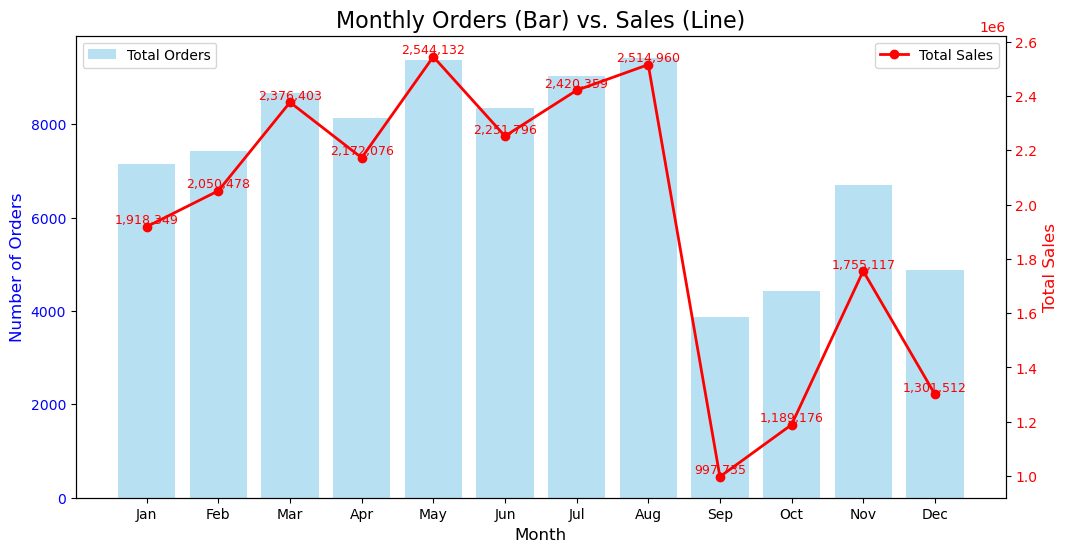

In [16]:
# Prepare monthly sales
monthly_sales = df.groupby(df['purchase_date'].dt.month)['payment_value'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']

# Prepare monthly orders
monthly_orders = df.groupby(df['purchase_date'].dt.month)['order_id'].nunique().reset_index()
monthly_orders.columns = ['month', 'total_orders']

# Merge into one dataframe
monthly_data = monthly_sales.merge(monthly_orders, on='month')

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# --- Bar chart for orders ---
bars = ax1.bar(monthly_data['month'], monthly_data['total_orders'], color='skyblue', alpha=0.6, label="Total Orders")
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Number of Orders", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Add data labels for bars
# for bar in bars:
#     height = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width()/2, height, f"{height:,}", ha='center', va='bottom', fontsize=9, color='blue')

# --- Line chart for sales ---
ax2 = ax1.twinx()
line = ax2.plot(monthly_data['month'], monthly_data['total_sales'], color='red', marker='o', linewidth=2, label="Total Sales")
ax2.set_ylabel("Total Sales", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add data labels for line points
for x, y in zip(monthly_data['month'], monthly_data['total_sales']):
    ax2.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9, color='red')

# --- Title & Legends ---
plt.title("Monthly Orders (Bar) vs. Sales (Line)", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


### Which payment methods are most popular among customers?

payment_type
credit_card    64421
wallet         16935
voucher         4788
debit_card      1263
Name: payment_type, dtype: int64

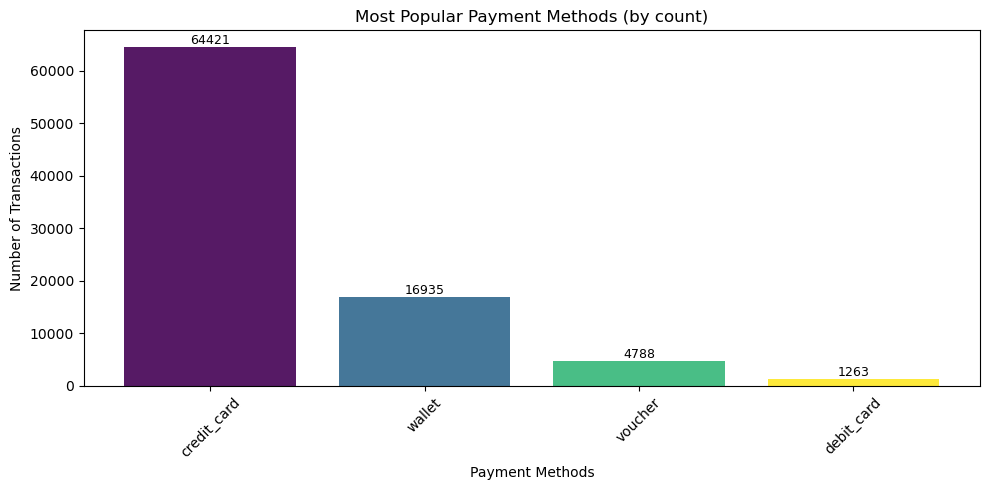

In [17]:
payment_method = df.groupby('payment_type')['payment_type'].count().nlargest()
display(payment_method)
plt.figure(figsize=(10,5))

# Create a color gradient (hue effect)
colors = plt.cm.viridis(np.linspace(0,1,len(payment_method)))

# Bar plot
bars = plt.bar(payment_method.index, payment_method.values, color=colors, alpha=0.9)

# Labels
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Methods')
plt.title('Most Popular Payment Methods (by count)')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}", 
             ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which regions generate the highest number of orders?

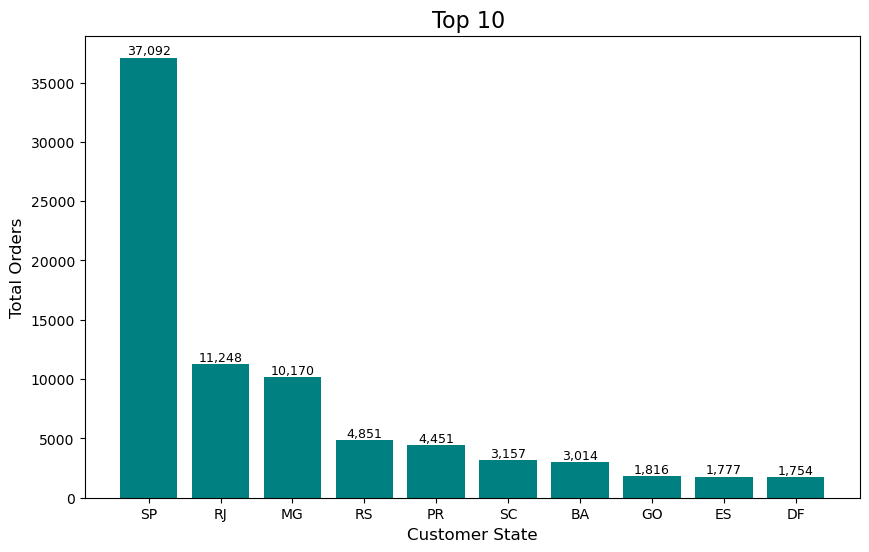

In [18]:
# Group by state and count unique orders
orders_by_state = df.groupby('customer_state')['order_id'].nunique().reset_index()
orders_by_state = orders_by_state.sort_values(by='order_id', ascending=False).head(10)
orders_by_state.columns = ['state', 'total_orders']

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(orders_by_state['state'], orders_by_state['total_orders'], color='teal')

plt.title("Top 10 ", fontsize=16)
plt.xlabel("Customer State", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:,}", ha='center', va='bottom', fontsize=9)

plt.show()

### Are there delays in specific regions or product categories?

In [20]:
avg_delivery_time_by_products = df.groupby('product_category_name')['delivery_days'].mean().reset_index().sort_values(by='delivery_days',ascending=False)
avg_delivery_time_by_products.head()

,product_category_name,delivery_days
23,diapers_and_hygiene,31.000000
57,office_furniture,22.793561
30,fashion_male_clothing,17.473684
12,christmas_supplies,16.185185
29,fashion_childrens_clothes,16.000000


In [23]:
avg_delivery_time_by_region = df.groupby('customer_state')['delivery_days'].mean().reset_index().sort_values(by='delivery_days',ascending=False)
avg_delivery_time_by_region.head(10)

,customer_state,delivery_days
21,RR,28.972973
3,AP,28.522388
2,AM,26.847826
1,AL,25.206154
13,PA,23.794743
0,AC,21.986486
9,MA,21.859038
24,SE,21.720539
5,CE,21.253406
14,PB,21.091667


### What is the average delivery time across orders?

,customer_state,delivery_days
0,AC,22.0
1,AL,25.0
2,AM,27.0
3,AP,29.0
4,BA,20.0
5,CE,21.0
6,DF,13.0
7,ES,16.0
8,GO,16.0
9,MA,22.0


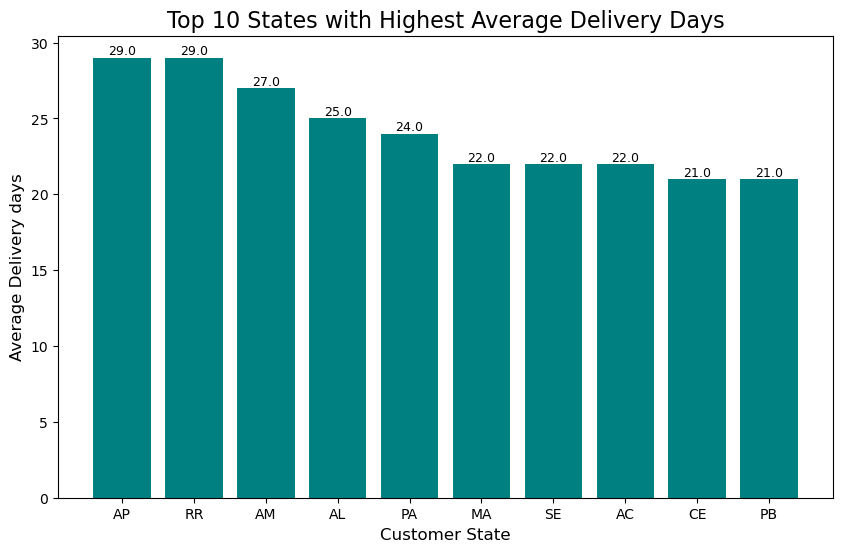

In [24]:
# Group by state and count unique orders
categories_by_state =df.groupby('customer_state')['delivery_days'].mean().reset_index()

# Round to 0 decimals
categories_by_state['delivery_days'] = categories_by_state['delivery_days'].round(0)

display(categories_by_state.head(10))
categories_by_state = categories_by_state.sort_values(by='delivery_days',ascending=False).head(10)
categories_by_state.columns = ['state', 'delivery_days']

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(categories_by_state['state'], categories_by_state['delivery_days'], color='teal')

plt.title("Top 10 States with Highest Average Delivery Days", fontsize=16)
plt.xlabel("Customer State", fontsize=12)
plt.ylabel("Average Delivery days", fontsize=12)

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:,}", ha='center', va='bottom', fontsize=9)

plt.show()